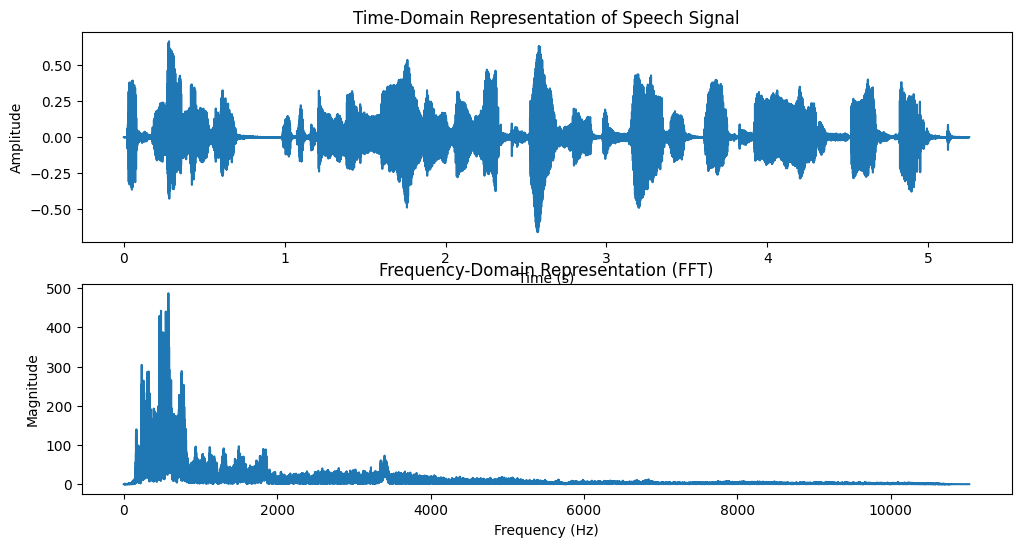

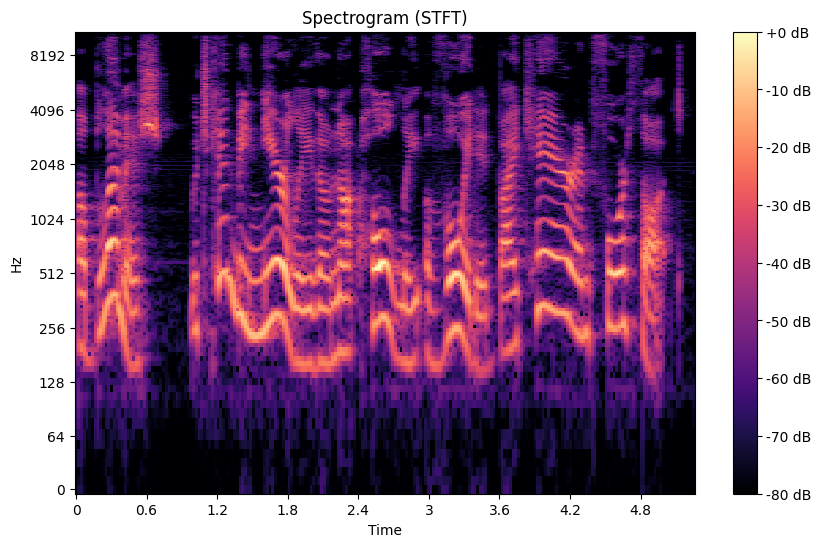

Energy in low-frequency range (Vowels): 1519240.75
Energy in high-frequency range (Fricatives): 67195.54
Energy Ratio (Vowels/Fricatives): 22.61


In [3]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.fftpack

# Load a speech signal from the LJ Speech dataset
file_path = "/content/LJ001-0139.wav"  # Using a sample audio file from Librosa
signal, sr = librosa.load(file_path, sr=None)

# Fourier Transform
fft_spectrum = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(fft_spectrum), d=1/sr)

# Plot Time-Domain and Frequency-Domain Representations
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, len(signal) / sr, len(signal)), signal)
plt.title("Time-Domain Representation of Speech Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_spectrum[:len(frequencies)//2]))
plt.title("Frequency-Domain Representation (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

# Short-Time Fourier Transform (STFT)
stft_result = librosa.stft(signal)
stft_db = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (STFT)")
plt.show()

# Energy Distribution Analysis
low_freq_range = (300, 3000)
high_freq_range = (4000, 8000)

frequencies = librosa.fft_frequencies(sr=sr, n_fft=stft_result.shape[0])
low_indices = np.where((frequencies >= low_freq_range[0]) & (frequencies <= low_freq_range[1]))[0]
high_indices = np.where((frequencies >= high_freq_range[0]) & (frequencies <= high_freq_range[1]))[0]

low_energy = np.sum(np.abs(stft_result[low_indices, :])**2)
high_energy = np.sum(np.abs(stft_result[high_indices, :])**2)
energy_ratio = low_energy / high_energy if high_energy != 0 else np.inf

print(f"Energy in low-frequency range (Vowels): {low_energy:.2f}")
print(f"Energy in high-frequency range (Fricatives): {high_energy:.2f}")
print(f"Energy Ratio (Vowels/Fricatives): {energy_ratio:.2f}")
